In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('BIKE DETAILS.csv')

In [4]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
# Question 1: What is the range of selling prices in the dataset?
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
selling_price_range

(5000, 760000)

In [6]:
 #2: What is the median selling price for bikes in the dataset?
 median_selling_price = df['selling_price'].median()
 median_selling_price

45000.0

In [7]:
#3: What is the most common seller type?
most_common_seller_type = df['seller_type'].value_counts().idxmax()
most_common_seller_type

'Individual'

In [8]:
#4: How many bikes have driven more than 50,000 kilometers?
bikes_driven_above_50k = df[df['km_driven'] > 50000].shape[0]
bikes_driven_above_50k

170

In [9]:
#5: What is the average km_driven value for each ownership type?
average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
average_km_driven_by_ownership

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [10]:
#6: What proportion of bikes are from the year 2015 or older?
bikes_from_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion_2015_or_older = bikes_from_2015_or_older / total_bikes
proportion_2015_or_older * 100

56.64467483506126

In [11]:
#7: What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [12]:
#8: What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom = df.loc[df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]
highest_ex_showroom

,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


In [13]:
#9: What is the total number of bikes listed by each seller type?
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


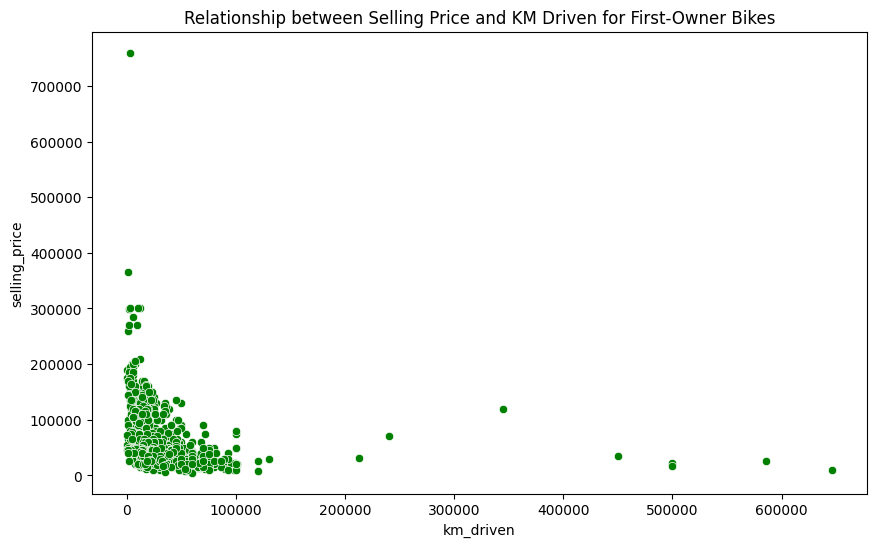

In [14]:
#10: What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = first_owner_bikes, color = 'g')
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.show()

In [15]:
#insights about the relationship between selling_price and km_driven for first-owner bikes:
# >> higher the kilometers driven, lower is the selling price of the bike
# >> lower the kilometers driven, higher the selling price of the bike

In [16]:
#11: Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
bike_data_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Number of outliers in km_driven: {outliers.shape[0]}")
print(f"Dataset size after removing outliers: {bike_data_no_outliers.shape[0]}")


Number of outliers in km_driven: 39
Dataset size after removing outliers: 1022


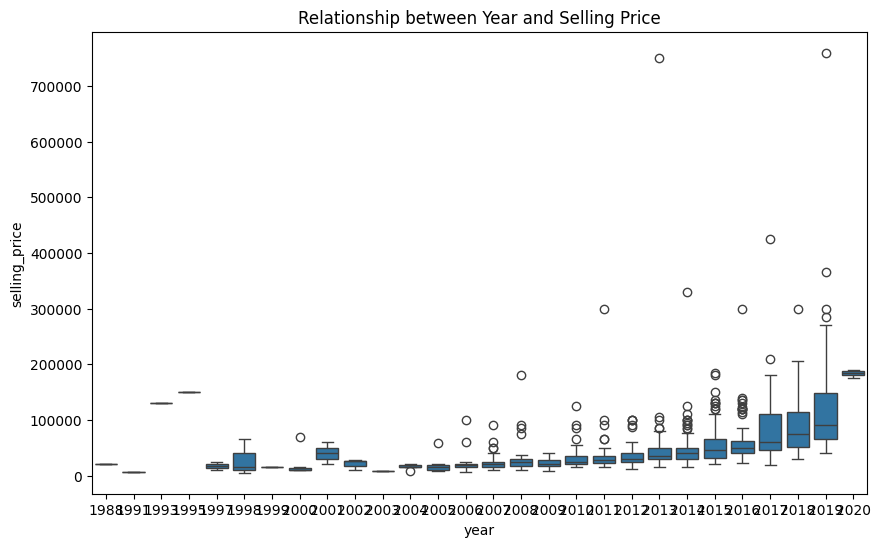

In [17]:
#12: Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'year', y = 'selling_price', data = df)
plt.title('Relationship between Year and Selling Price')
plt.show()

In [18]:
#13: What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2024

df['age'] = current_year - df['year']

df = df[df['age'] > 0]
df['depreciation_per_year'] = df['selling_price'] / df['age']
average_depreciation = df['depreciation_per_year'].mean()
print("₹",average_depreciation.round(0))

₹ 8037.0


In [19]:
#14: Which bike names are priced significantly above the average price for their manufacturing year?
year_avg_price = df.groupby('year')['selling_price'].mean()
df = df.merge(year_avg_price, on='year', suffixes=('', '_year_avg'))
threshold_factor = 1.5

df['above_average'] = df['selling_price'] > (threshold_factor * df['selling_price_year_avg'])
significantly_priced_bikes = df[df['above_average']]

print("Bikes priced significantly above the average for their manufacturing year:")
print(significantly_priced_bikes[['name', 'year', 'selling_price', 'selling_price_year_avg']])


Bikes priced significantly above the average for their manufacturing year:
                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     selling_price_year_avg  
2              87660.374046  
7              34289.285714  
13            119689.511628  
18          

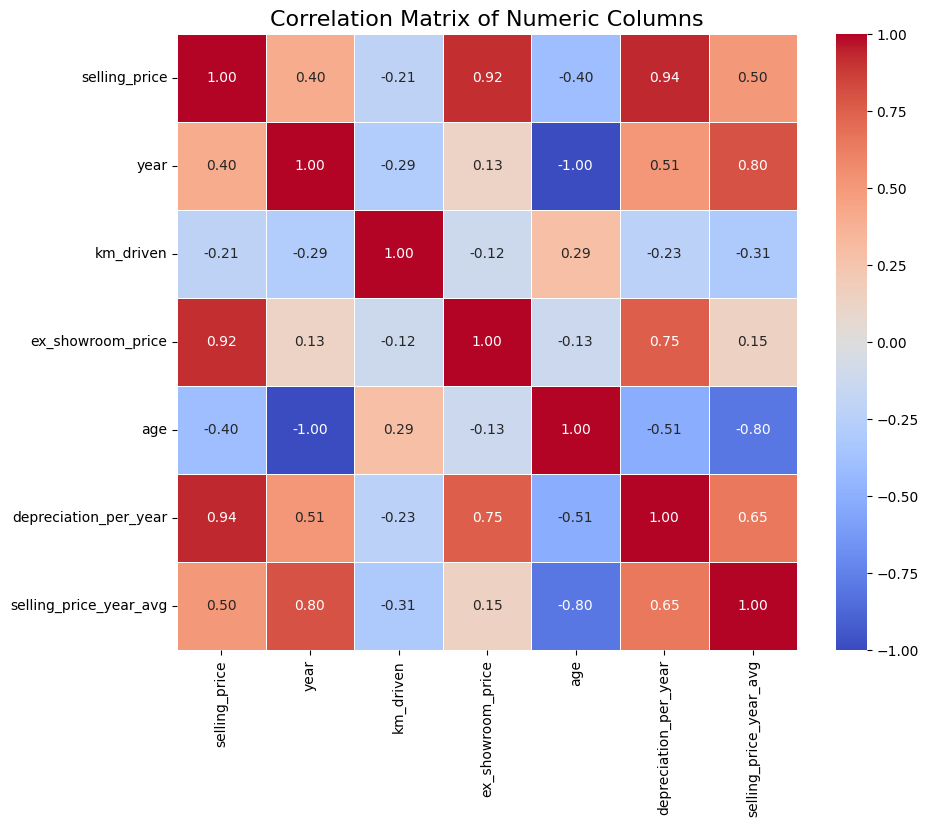

In [20]:
#15: Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns', fontsize=16)
plt.show()
